In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/cambridgecoding/machinelearningregression/master/data/bikes.csv')
data.head(3)

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0


In [2]:
data['date'] = data['date'].apply(pd.to_datetime)
data['year'] = [i.year for i in data['date']]
data['month'] = [i.month_name()[0:3] for i in data['date']]
data['day'] = [i.day_name()[0:3] for i in data['date']]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

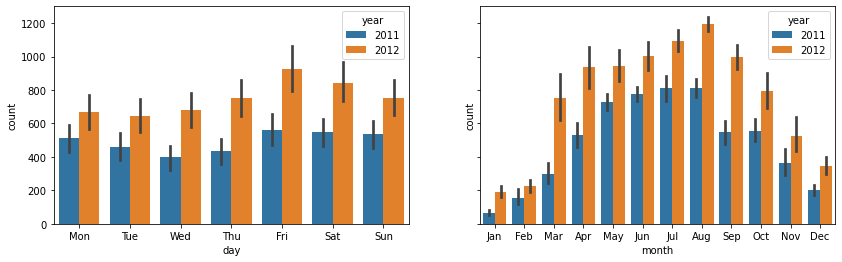

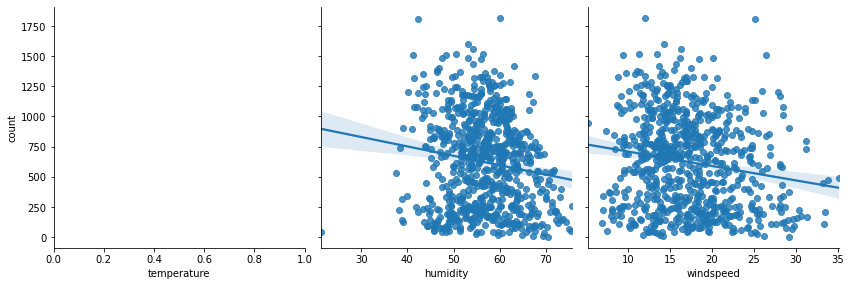

In [4]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='count', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='count', hue='year', ax=ax2)
pp = sns.pairplot(data=data,
y_vars=['count'],
x_vars=['temperature', 'humidity', 'windspeed'],
kind='reg',
height=4)

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x = data[['temperature', 'humidity', 'windspeed']]
y = data['count']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: 0.43
MAE score: 227.96
EVS score: 0.43


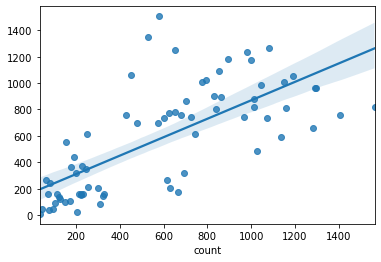

In [7]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [9]:
import pickle
with open('bike_model_xgboost.pkl', 'wb') as file:
    pickle.dump(classifier, file)